In [169]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [170]:
df = pd.read_csv('fourCollections.csv', dtype={'collection_slug': 'str', 'asset_id': 'int', 'asset_name': 'str', 'owner_username': 'str', 'owner_address': 'str', 'event_type': 'str'})
df.drop('Unnamed: 0.1', axis=1, inplace=True)
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('collection_slug', axis=1,inplace=True)
df.drop('asset_contract_date', axis=1, inplace=True)
df.drop('asset_name', axis=1, inplace=True)
df.drop('asset_id', axis=1, inplace=True)
df.drop('owner_username', axis=1, inplace=True)
df.drop('owner_address', axis=1, inplace=True)
df['event_timestamp'] = pd.to_datetime(df['event_timestamp']).dt.strftime('%m/%d/%Y')
df['month'] = pd.to_datetime(df['event_timestamp']).dt.strftime('%m')
df['day'] = pd.to_datetime(df['event_timestamp']).dt.strftime('%d')
df['year'] = pd.to_datetime(df['event_timestamp']).dt.strftime('%Y')
df.drop_duplicates(keep='first')
df

,collection_name,event_timestamp,event_type,month,day,year
0,Azuki,06/17/2022,created,06,17,2022
1,Azuki,06/17/2022,created,06,17,2022
2,Azuki,06/17/2022,created,06,17,2022
3,Azuki,06/17/2022,created,06,17,2022
4,Azuki,06/17/2022,created,06,17,2022
...,...,...,...,...,...,...
1465480,Crypto Coven,06/10/2022,offer_entered,06,10,2022
1465481,Crypto Coven,06/10/2022,offer_entered,06,10,2022
1465482,Crypto Coven,06/10/2022,offer_entered,06,10,2022
1465483,Crypto Coven,06/10/2022,offer_entered,06,10,2022


In [171]:
g = df.groupby(['collection_name', 'month', 'day', 'year']).agg({'event_timestamp': ['count']})

In [172]:
g.drop('Bored Ape Chemistry Club', inplace=True)
g.drop('Bored Ape Kennel Club', inplace=True)
g.drop('DourDarcels', inplace=True)
g.drop('NFTfi Promissory Note', inplace=True)
g.drop('Rug Radio Membership Pass', inplace=True)


In [173]:
g

event_timestamp
                                         count
collection_name month day year                
Azuki           01    12  2022           20659
                      13  2022            7100
                      14  2022            2638
                      15  2022            2292
                      16  2022            1939
...                                        ...
mfers           12    27  2021             509
                      28  2021             601
                      29  2021             931
                      30  2021             812
                      31  2021            1143

[1007 rows x 1 columns]

In [257]:
df = pd.read_csv('g.csv')
df = df[df['year'] == 2022]
df['time'] = pd.to_datetime(df['time'])
df

,collection_name,month,day,year,count,time
0,Azuki,1,12,2022,20659,2022-01-12
1,Azuki,1,13,2022,7100,2022-01-13
2,Azuki,1,14,2022,2638,2022-01-14
3,Azuki,1,15,2022,2292,2022-01-15
4,Azuki,1,16,2022,1939,2022-01-16
...,...,...,...,...,...,...
970,mfers,6,13,2022,913,2022-06-13
971,mfers,6,14,2022,826,2022-06-14
972,mfers,6,15,2022,1289,2022-06-15
973,mfers,6,16,2022,1028,2022-06-16


In [ ]:
#dfa = df.groupby([pd.Grouper(key='time', freq='W')])['count'].sum()

/var/folders/f3/qxtgxx_n1xsfz4jsmn1rg6tm0000gn/T/ipykernel_58883/860676893.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(700/dpi, 1000/dpi), dpi=dpi)


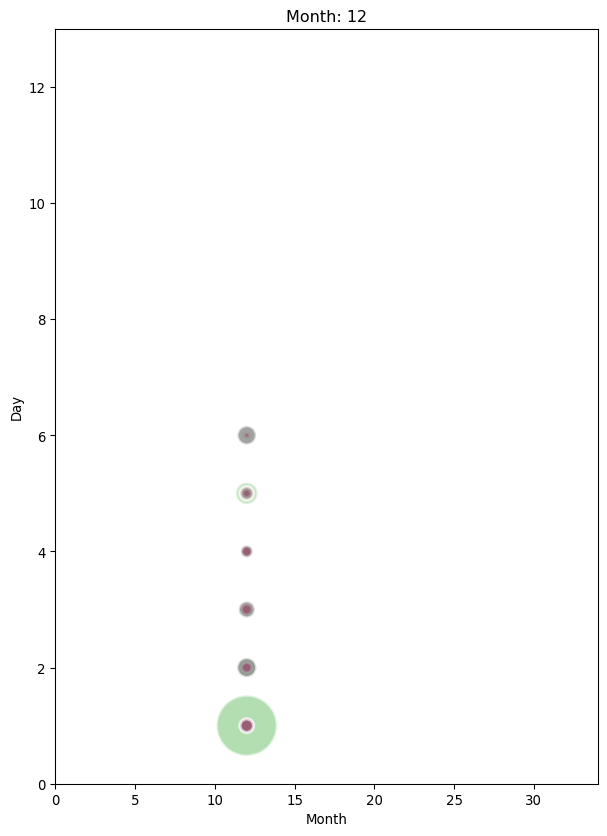

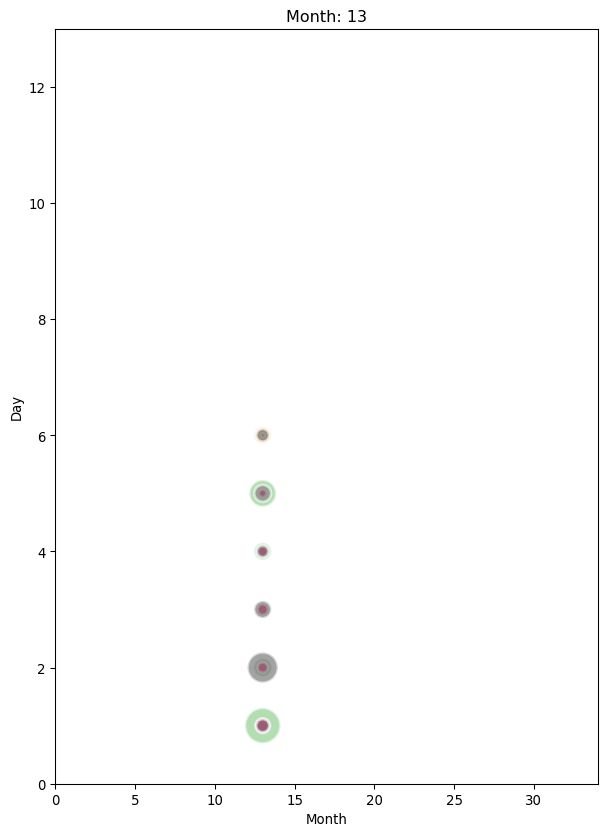

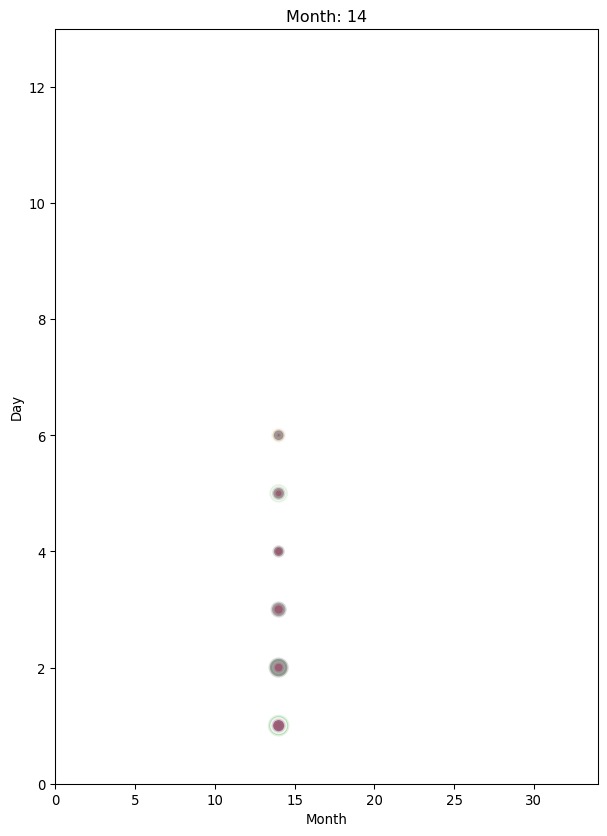

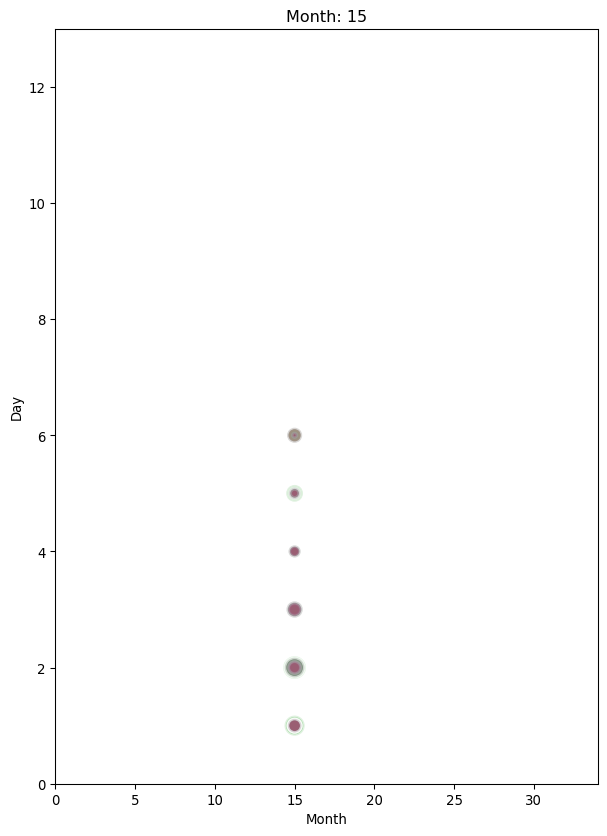

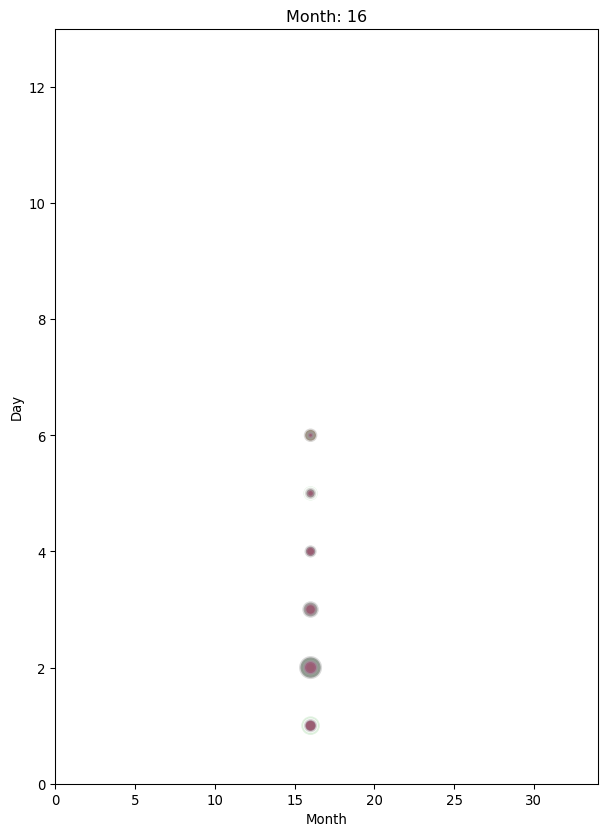

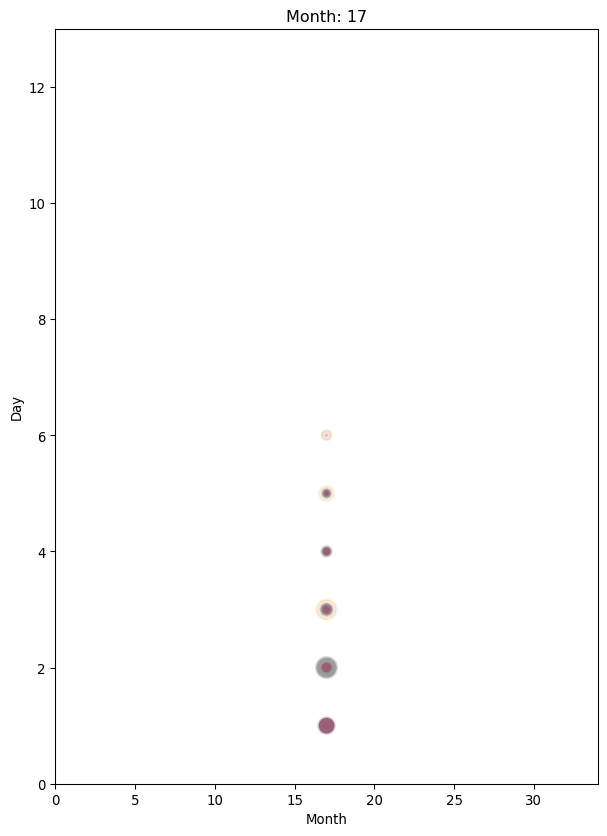

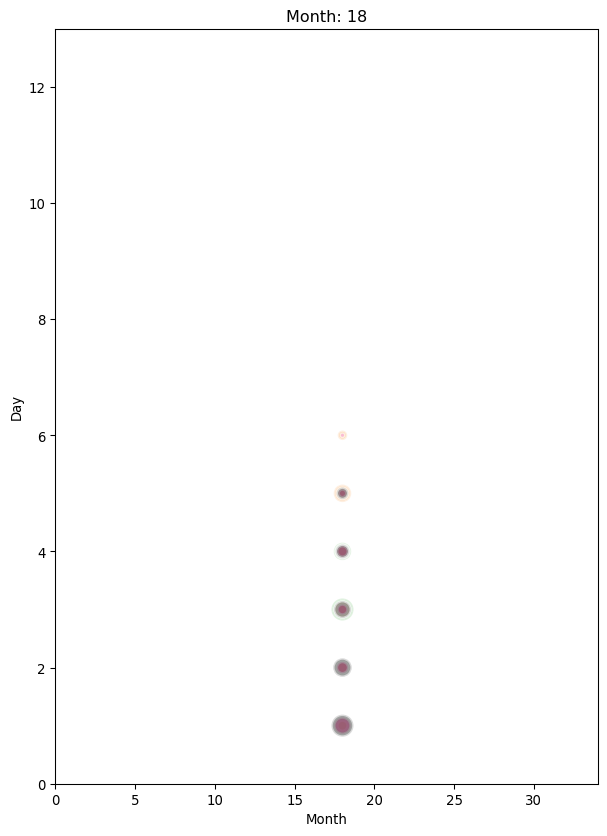

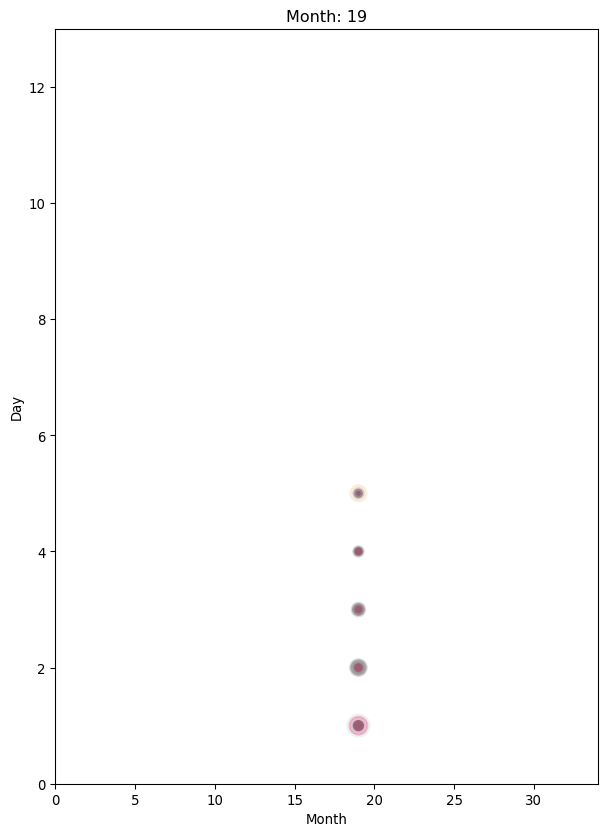

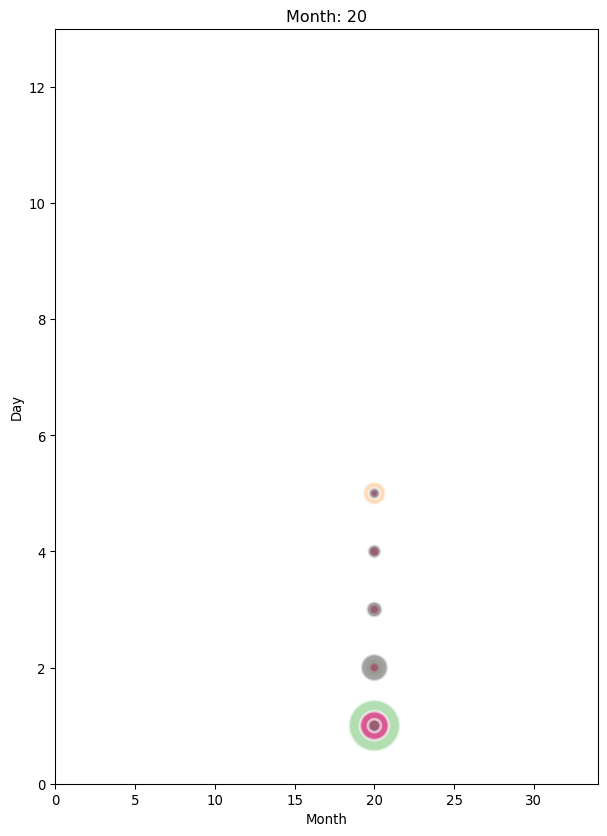

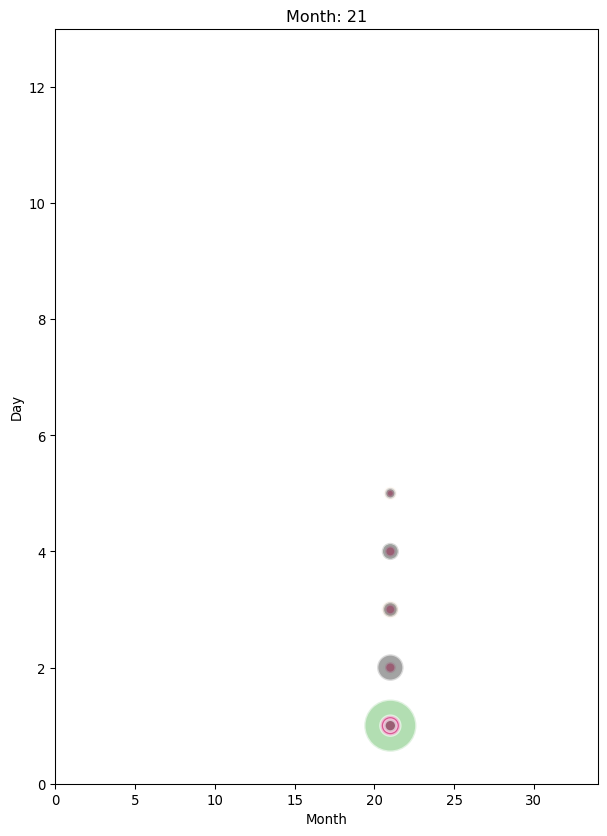

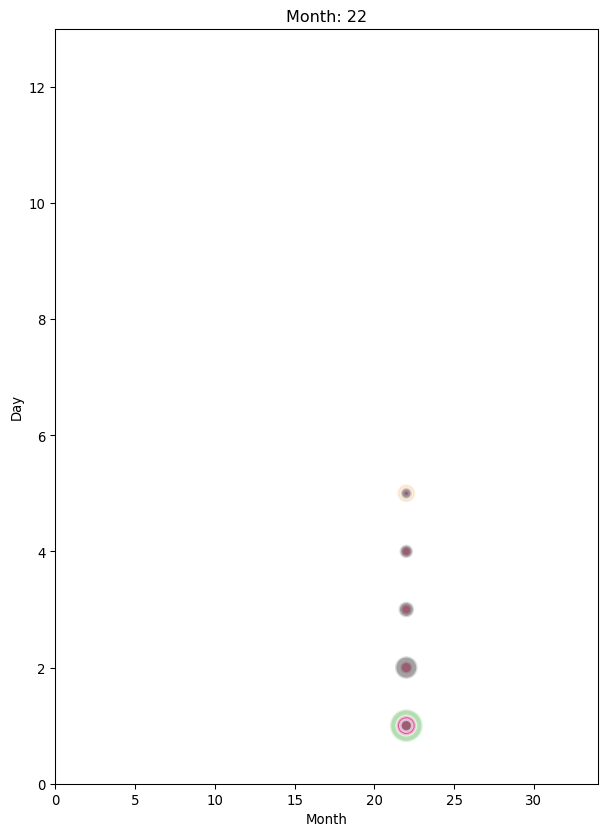

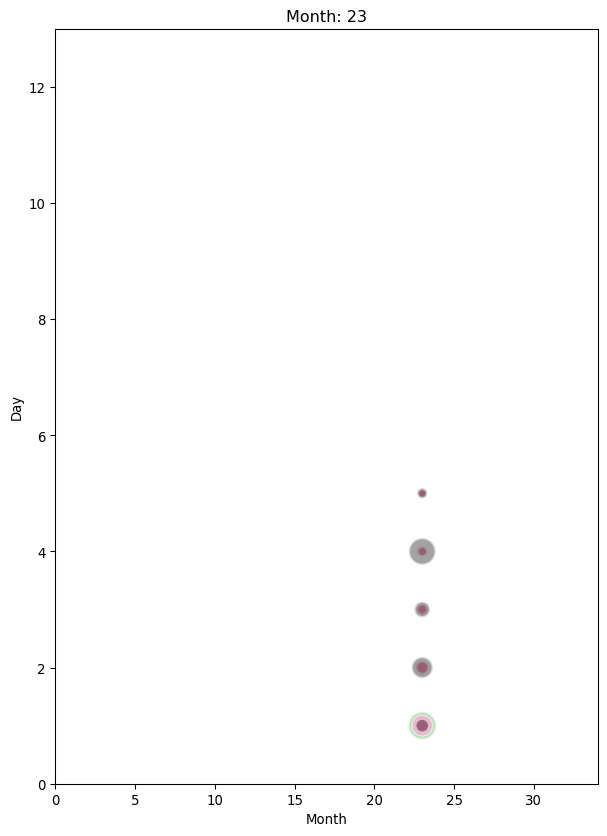

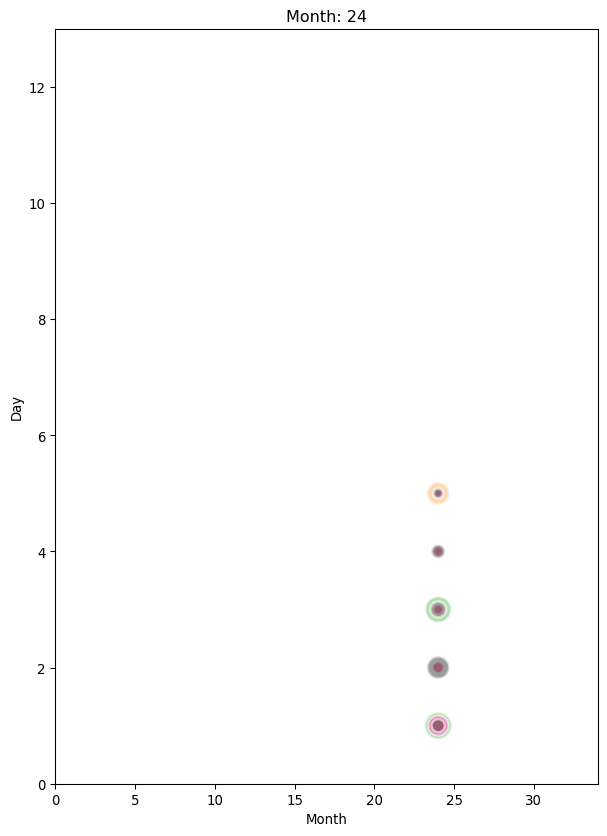

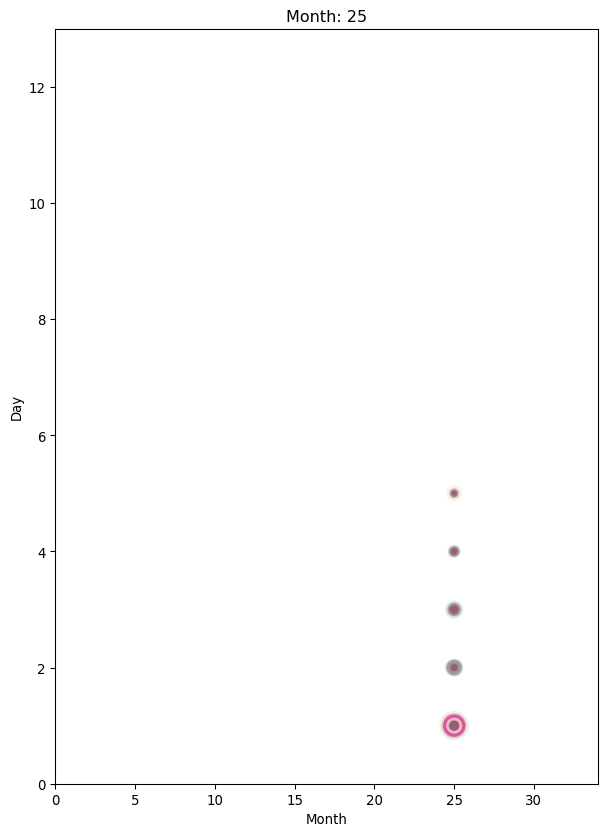

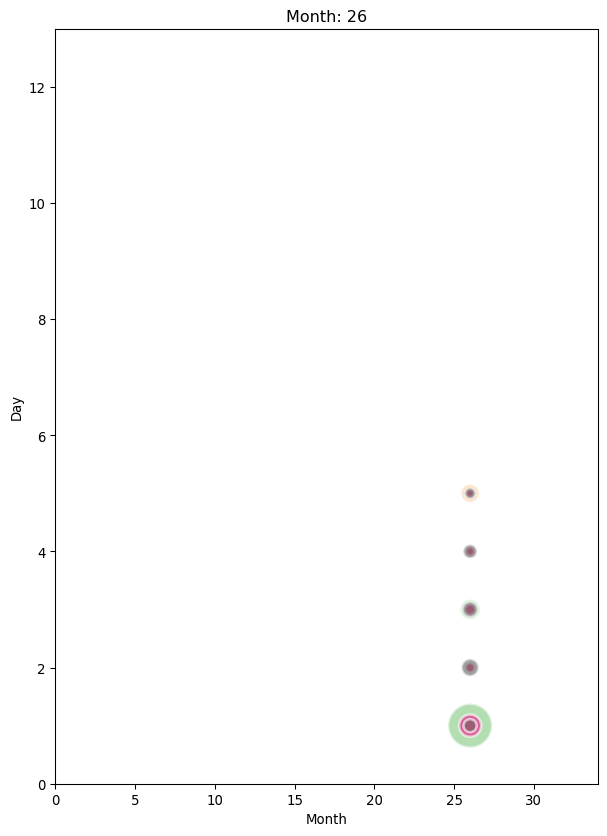

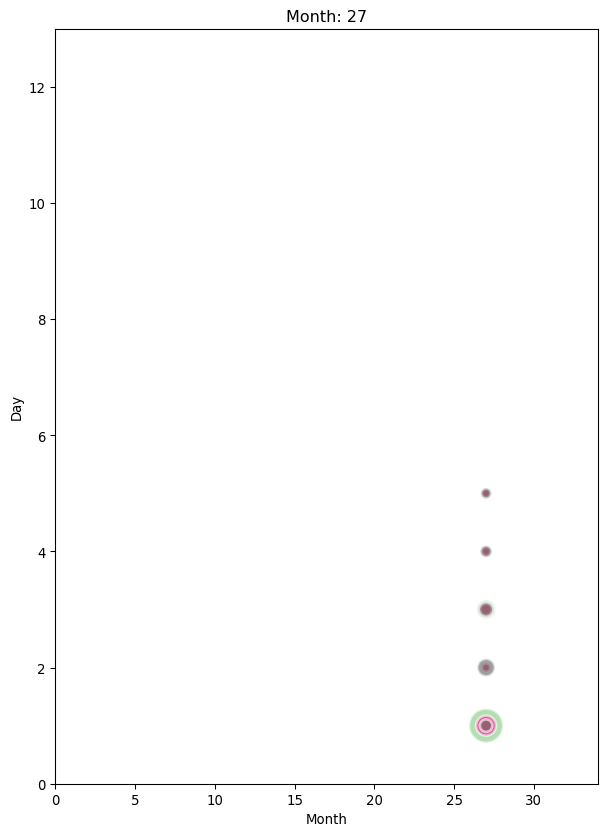

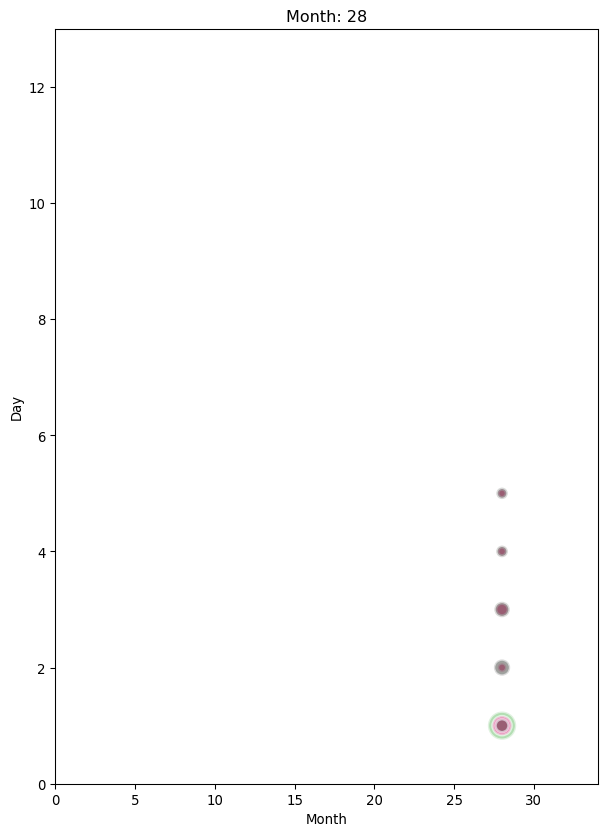

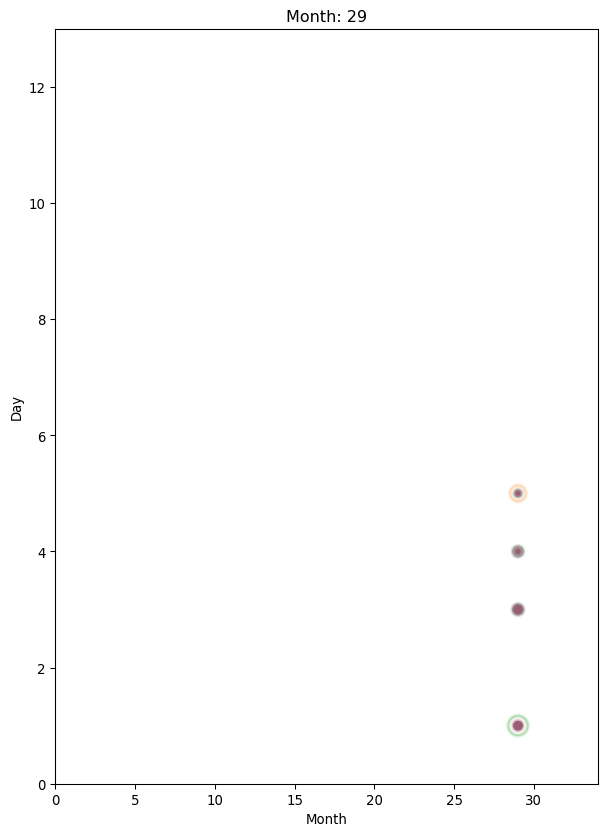

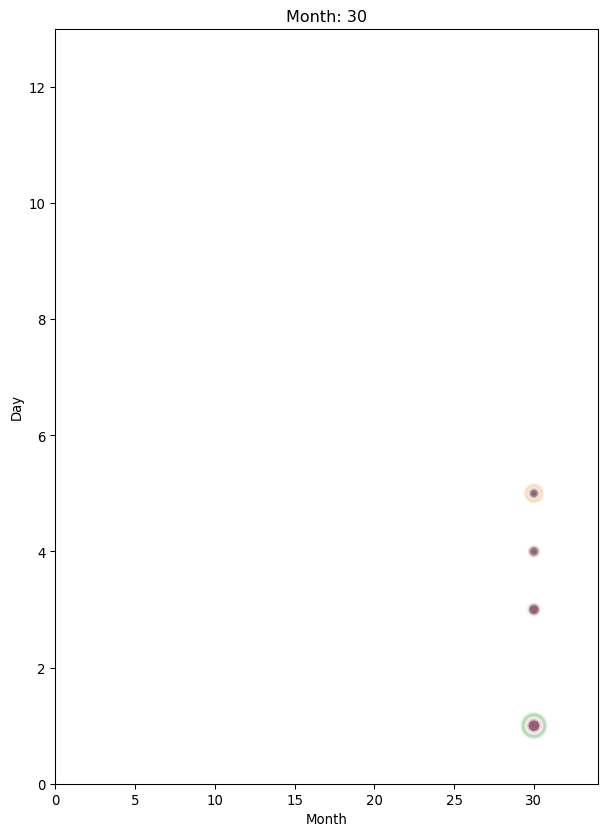

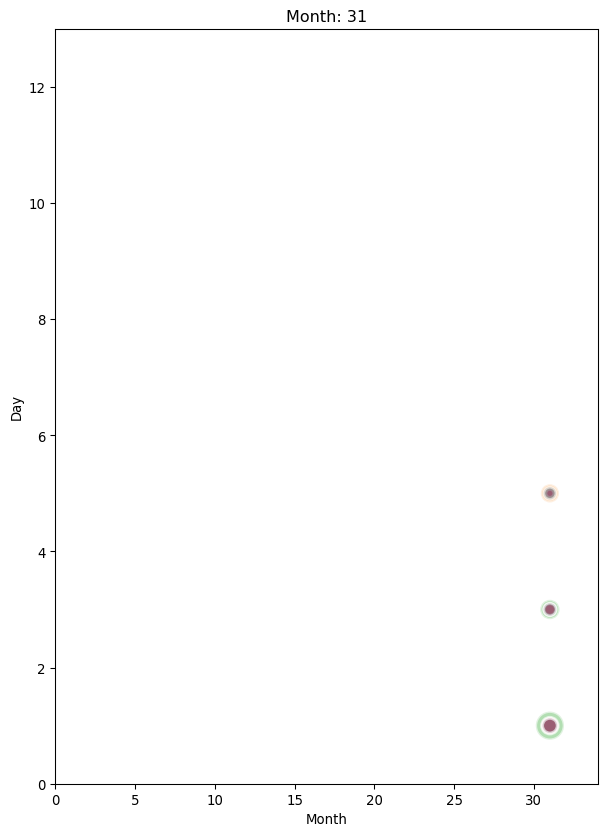

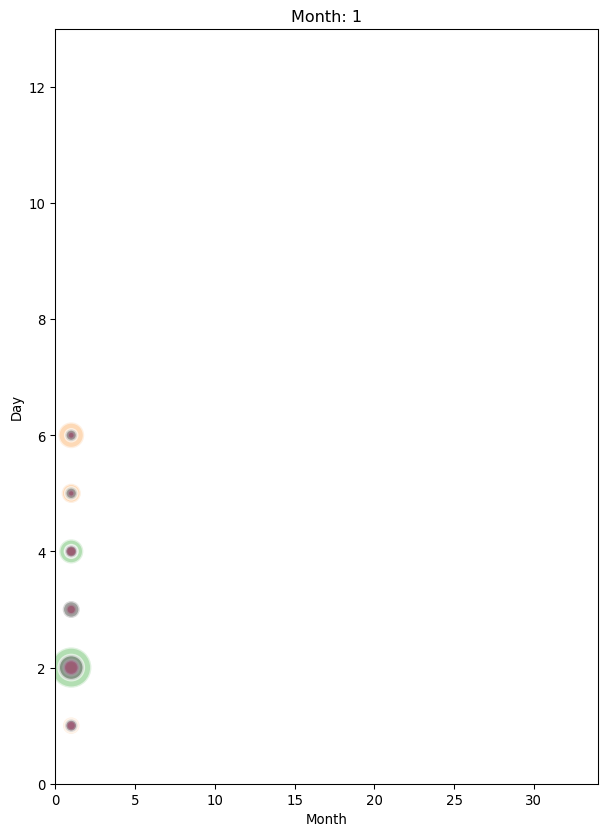

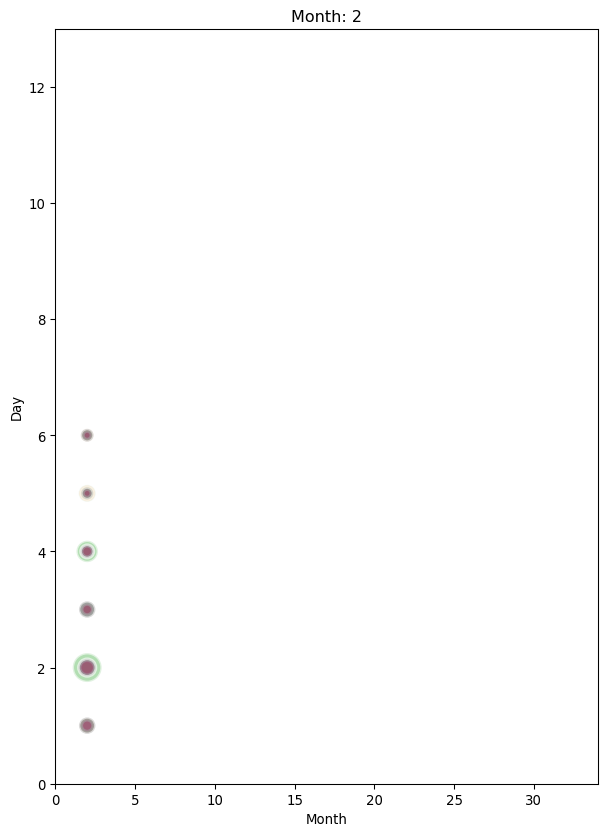

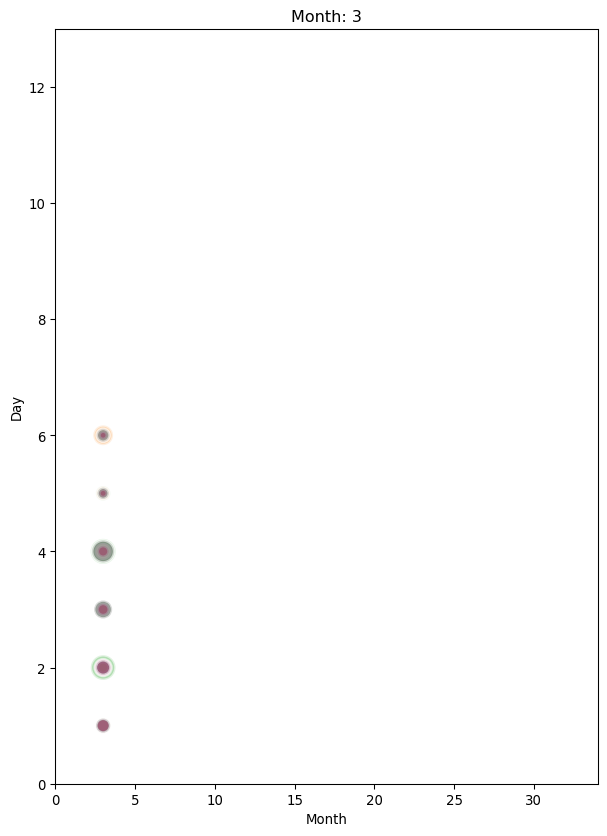

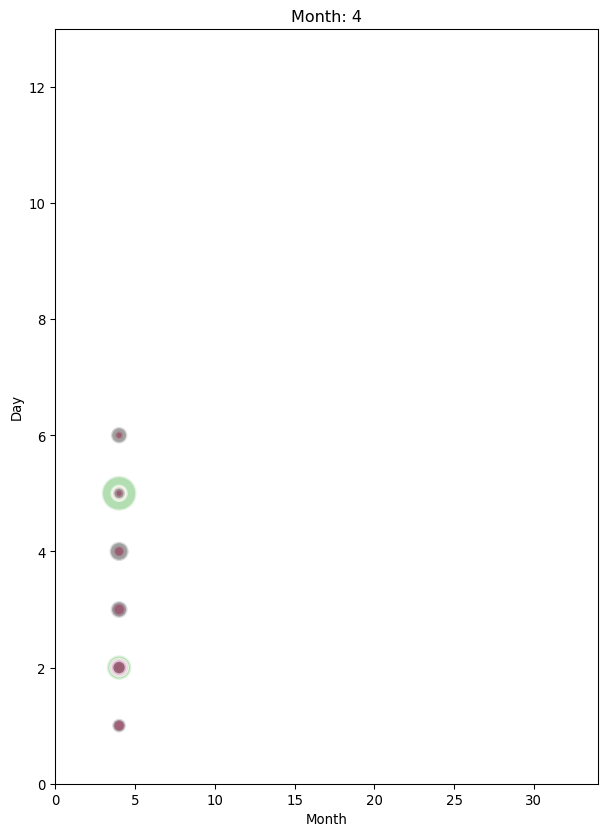

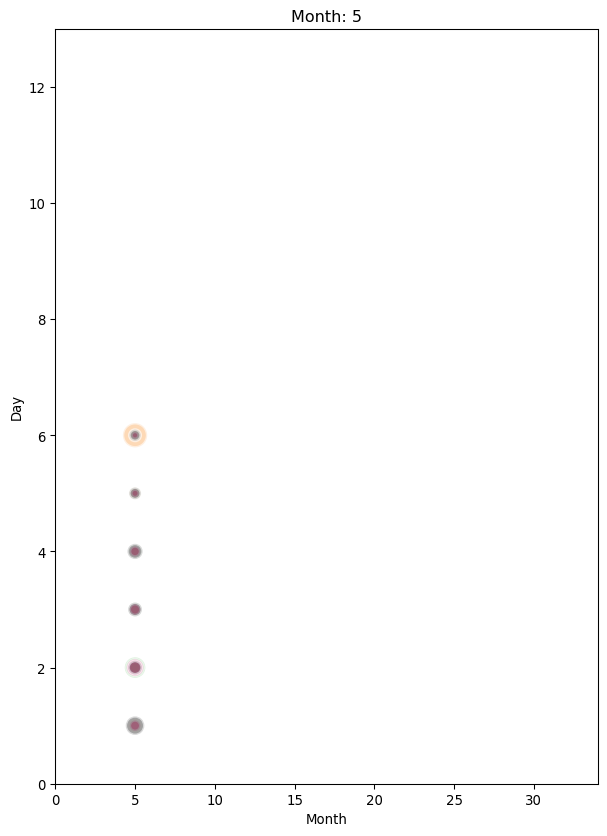

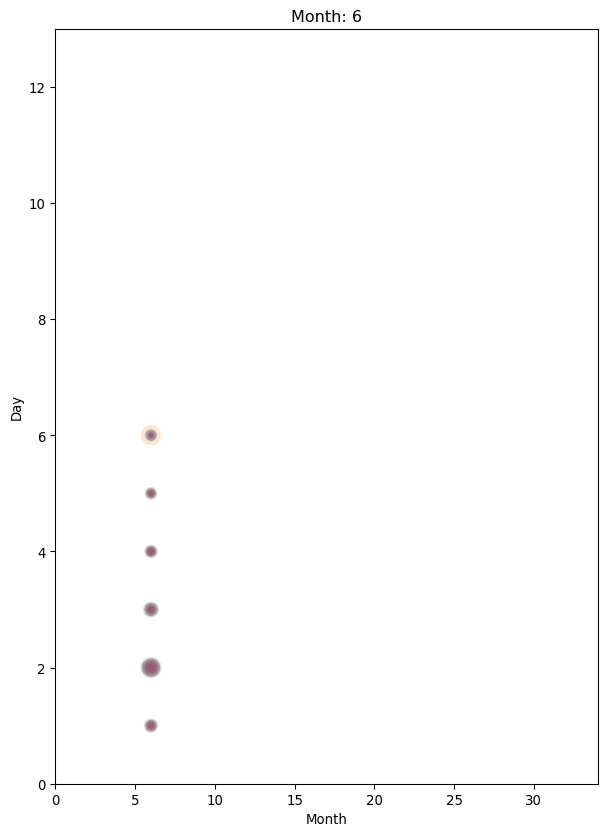

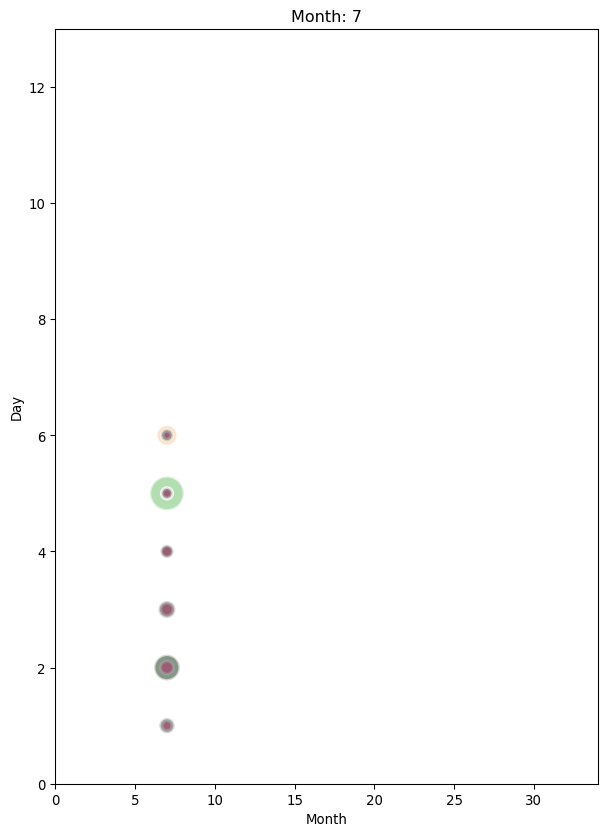

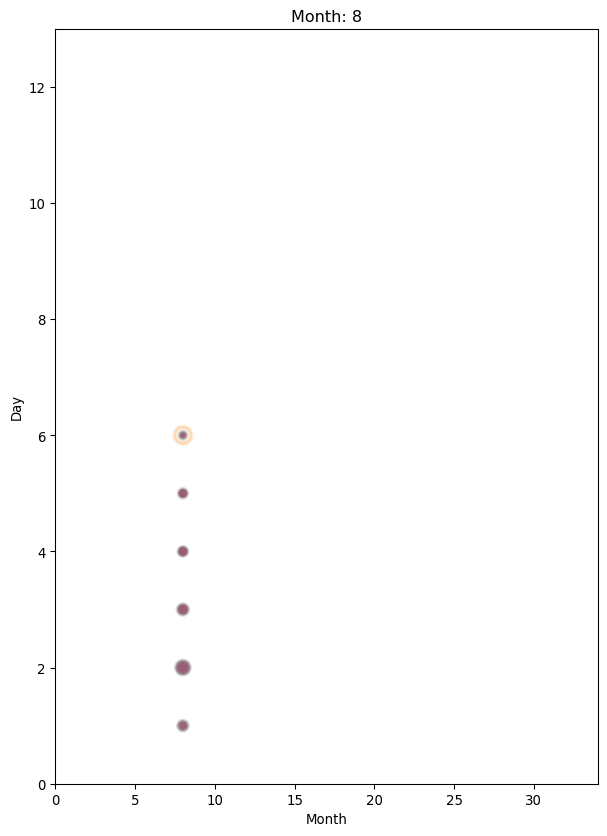

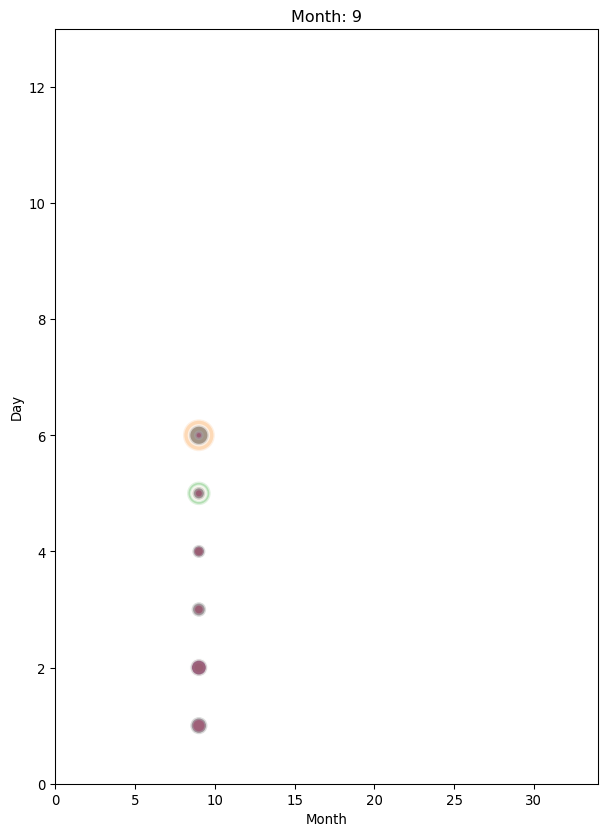

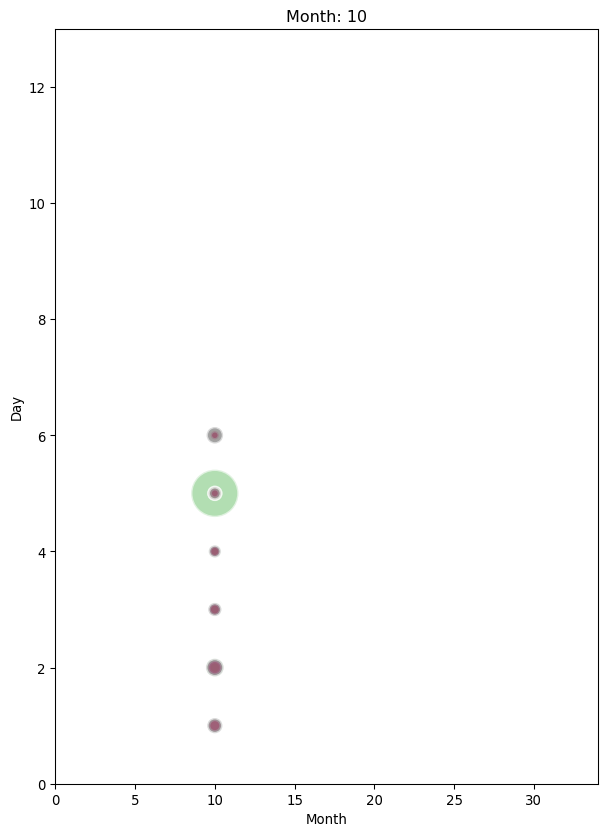

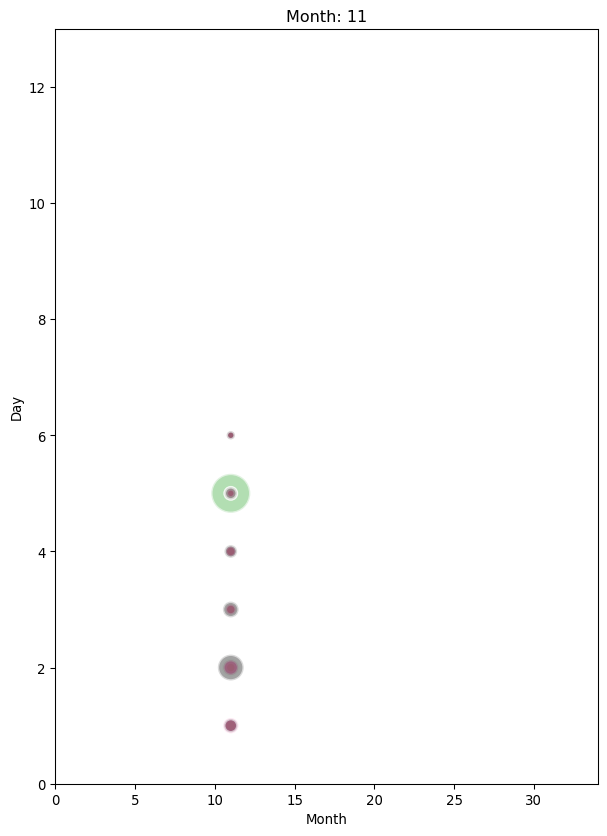

In [261]:
# image resolution
dpi=96
df['collection_name']=pd.Categorical(df['collection_name'])
# For each year:
for i in df.day.unique():
 
    # Turn interactive plotting off
    plt.ioff()

    # initialize a figure
    fig = plt.figure(figsize=(700/dpi, 1000/dpi), dpi=dpi)
    
    # Find the subset of the dataset for the current year
    subsetData = df[ df.day == i ]

    # Build the scatterplot
    plt.scatter(
        x=subsetData['day'], 
        y=subsetData['month'], 
        s=subsetData['count']/10, 
        c=subsetData['collection_name'].cat.codes, 
        cmap="Accent", alpha=0.6, edgecolors="white", linewidth=2)
    
    # Add titles (main and on axis)
    plt.xlabel("Month")
    plt.ylabel("Day")
    plt.title("Month: "+str(i) )
    plt.xlim(0,34)
    plt.ylim(0, 13)